# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


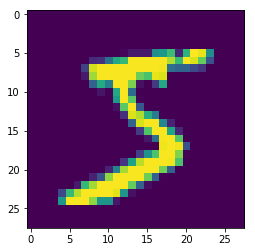

In [0]:
print (X_train.shape)  # Provide number of images , height and width (matrix form)
from matplotlib import pyplot as plt  #Plotting library in python
%matplotlib inline
plt.imshow(X_train[0]) # Showing first image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)  #converting into array of (60000,28,28,1) where 1 is channel depth (for both X_train , X_test) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Converting pixel values in numbers and normalising them to prevent skewness of data points.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10] #It gives us first 10 labels of first 10 images. 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)  #one hot encoding of Y_train
Y_test = np_utils.to_categorical(y_test, 10)  # same as above for test

In [0]:
Y_train[:10]   #Printing numbers in 10-d form (one hot encoded form)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Main Block
---------------

In [0]:
from keras.layers import Activation        
model = Sequential()

                                                                                  #input_conv   Receptive field output 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))         #28x28        3x3           26x26
model.add(Convolution2D(10, 1, activation='relu'))                                   #26x26        1x1           26x26 Reducing no of kernels by 1x1 convolution
model.add(Convolution2D(10, 26))                                                     #26x26        26x26         1x1  
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()  #Tells about each layer details in terms of (layer type output shape and parameter associated)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_284 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_285 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_286 (Conv2D)          (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_27 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Defining the loss function , optimizer for back-prop and result metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) #Trains the model with training set , batch size - 32 , no of epoch=10 (1 epoch means 1 pass for all images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2021 - acc: 0.9405
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0719 - acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0523 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0421 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0347 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0306 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0247 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0217 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0179 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0152 -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) # validates the model on testing set using evaluate function

In [0]:
print(score) # prints loss and accuracy

[0.08364548649995031, 0.9793]


In [0]:
y_pred = model.predict(X_test)  # Generates output predictions for the input samples

In [0]:
print(y_pred[:9]) #list 1st 10 predictions(one hot form)  
print(y_test[:9]) #list 1st 10 labels

[[1.2133114e-19 1.3583201e-20 6.4380229e-13 2.1165013e-07 8.5469051e-21
  1.7904686e-15 7.3866790e-32 9.9999976e-01 3.9000202e-13 3.0564024e-08]
 [8.4174889e-12 3.7776752e-12 1.0000000e+00 3.6231384e-14 3.8212083e-26
  5.2223414e-16 2.8134932e-09 1.3938068e-23 2.9285398e-13 5.0986274e-22]
 [4.4067658e-08 9.9997175e-01 2.4098522e-06 2.5281262e-09 1.7942837e-05
  5.5753241e-10 1.1153100e-09 9.7106715e-07 6.8652389e-06 2.1589107e-08]
 [1.0000000e+00 3.0636291e-19 6.7600125e-10 1.4583525e-16 1.8606249e-19
  2.8861465e-13 1.1144058e-09 1.1387901e-12 1.6762212e-12 1.8395352e-10]
 [3.0342785e-15 2.4567825e-16 1.1579256e-13 1.0995107e-12 9.9999976e-01
  1.4280339e-18 1.9879730e-13 7.2346304e-12 6.9134830e-11 2.8848117e-07]
 [1.4877515e-12 9.9993706e-01 1.0509312e-08 2.0460713e-11 1.6244406e-06
  9.2738812e-14 1.5381777e-13 5.7033289e-05 4.2388410e-06 3.5962156e-08]
 [1.5272254e-17 1.1777043e-13 3.4836422e-08 3.1230647e-14 9.7975278e-01
  4.7425561e-09 2.1203759e-16 1.8776539e-08 1.9921420e-02 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])  #Initialized a dictionary and checking each layer.

Block to represent graphical from of filter/convolution happened on mentioned layer -:

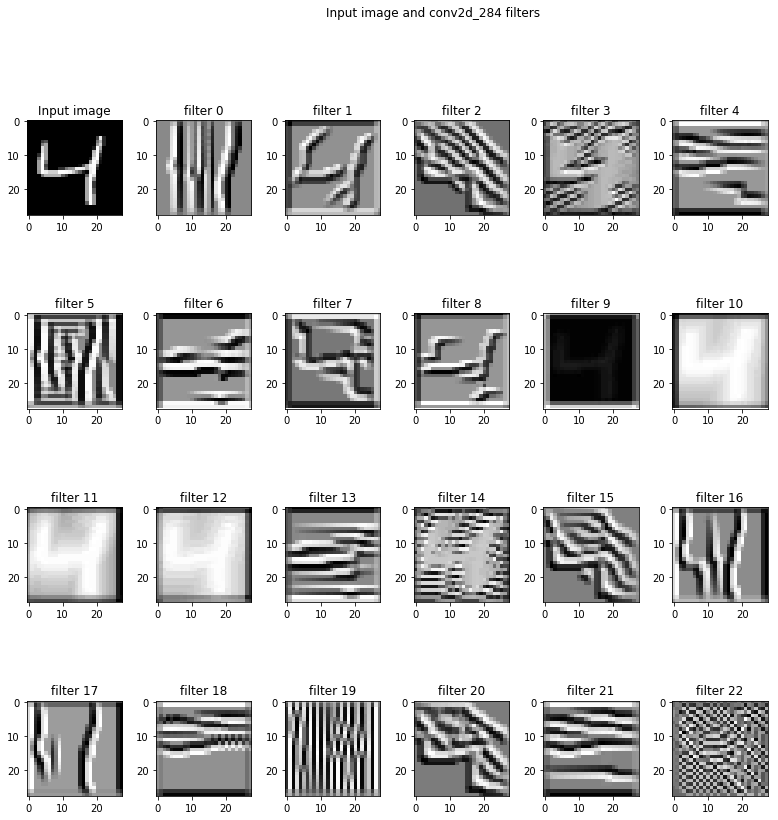

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_284'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

#Modified Networks

Part 1 - Model1 checking accuravy without any dropout and Batch Normalization technique

In [0]:
#from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model1 = Sequential()

#keras.layers.normalization.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None) 
                                                                                  #input - conv - receptive feild
                                                                                  #input_conv|Receptive Field|output  

model1.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 |3x3|26x26  
model1.add(Convolution2D(10, 3, 3, activation='relu'))                            #26x26 |5x5|24x24  
model1.add(Convolution2D(20, 3, 3, activation='relu'))                            #24x24 |7x7|22x22
model1.add(MaxPooling2D(pool_size=(2,2)))                                         #      |14x14|11x11    
model1.add(Convolution2D(5, 1, activation='relu'))                                #11x11 |14x14|11x11 
model1.add(Convolution2D(10,3,3, activation='relu'))                              #11x11 |16x16|9x9 
model1.add(Convolution2D(22,3,3, activation='relu'))                              #9x9   |18x18|7x7                  
model1.add(Convolution2D(25,3,3,activation='relu'))                               #7x7   |20x20|5x5
model1.add(Convolution2D(30,3,3,activation='relu'))                               #5x5   |22x22|3x3
#model1.add(Convolution2D(10,3,3,activation='relu'))                              #3x3   |24x24|1x1 
model1.add(Convolution2D(10,3))
#model1.add(Dropout(0.2))
#sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
#model.add(Convolution2D(10, 26))
model1.add(Flatten())
model1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserW

In [0]:
model1.build()

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 26, 26, 5)         50        
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 24, 24, 10)        460       
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 11, 11, 5)         105       
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 9, 9, 10)          460       
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 7, 7, 22)          2002      
__________

Trial Variations 

In [0]:
#from keras.layers import Activation
#model1 = Sequential()

        #-----------Tried Parameter execeded----------                                                                           #input - conv - receptive feild
#model1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 -3x3 -26x26  
#model1.add(Convolution2D(64, 3, 3, activation='relu'))                             #26x26 - 5x5 - 24x24  
#model1.add(Convolution2D(128, 3, 3, activation='relu'))                            #24x24 - 7x7 -22x22
#model1.add(MaxPooling2D(pool_size=(2,2)))                                         
#model1.add(Convolution2D(10, 1, activation='relu'))                                #11x11 -  14x14 
#model1.add(Convolution2D(20,3,3, activation='relu'))                                #11x11  16x16 
#model1.add(Convolution2D(40,3,3, activation='relu'))                                #9x9  18x18                  
#model1.add(Convolution2D(60,3,3,activation='relu'))                                #7x7 -    20x20
#model1.add(Convolution2D(80,3,3,activation='relu'))                                #5x5 -    22x22
#model1.add(Convolution2D(10,3,3,activation='relu'))
#model1.add(Convolution2D(10,11))
#model1.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))
#------------------------------------------------
#-----------------------2x2 instead of 1x1 at last layer came , accuracy was very low around 65%-----------------
#from keras.layers import Activation
#model1 = Sequential()

                                                                                   #input - conv - receptive feild
#model1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 -3x3 -26x26  
#model1.add(Convolution2D(64, 3, 3, activation='relu'))                             #26x26 - 5x5 - 24x24  
#model1.add(Convolution2D(10, 1, activation='relu'))                                #24x24 - 5x5 
#model1.add(MaxPooling2D(pool_size=(2,2)))                                          #       10x10 
#model1.add(Convolution2D(10, 3, 3, activation='relu'))                                #12x12  12x12 
#model1.add(Convolution2D(20, 3, 3, activation='relu'))                                #10x10  14x14
#model1.add(Convolution2D(10, 1, activation='relu'))                                #8x8 -  14x14 
#model1.add(MaxPooling2D(pool_size=(2,2)))                                          #         28x28
#model1.add(Convolution2D(10, 3, 3, activation='relu'))                                #4x4 -    30x30
#model1.add(Convolution2D(10, 2, 2, activation='relu'))                                #2x2 -    32x32
#model1.add(Convolution2D(5,3))
#model.add(Convolution2D(10, 26))
#model1.add(Flatten())
#model1.add(Activation('softmax'))
#Tried sample variation

In [0]:
#model.summary()

In [0]:
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model1.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.2207 - acc: 0.9313
Epoch 2/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0779 - acc: 0.9761
Epoch 3/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.0585 - acc: 0.9816
Epoch 4/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0498 - acc: 0.9849
Epoch 5/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0401 - acc: 0.9872
Epoch 6/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0356 - acc: 0.9887
Epoch 7/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0298 - acc: 0.9899
Epoch 8/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0282 - acc: 0.9907
Epoch 9/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0248 - acc: 0.9920
Epoch 10/20
60000/60000 [==============================] - 13s 224us/step - loss: 

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03638650634760547, 0.9907]


In [0]:
y_pred = model1.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.12446616e-06 3.74811397e-11 4.14943952e-06 4.81040333e-05
  1.18562333e-08 1.99425116e-07 9.33889164e-12 9.99931216e-01
  3.88528008e-07 1.38186242e-05]
 [8.90441646e-04 1.93377564e-05 9.97338712e-01 1.37870113e-04
  1.15538856e-09 3.06239417e-05 1.45856128e-03 1.14657491e-12
  1.24411148e-04 1.47824863e-10]
 [5.79902735e-05 9.89100635e-01 4.03838651e-03 2.73520331e-04
  1.35967019e-03 2.48852830e-05 5.49460994e-04 1.06820313e-03
  3.47478571e-03 5.25410542e-05]
 [9.99909759e-01 4.60730976e-12 5.12075312e-05 1.10644760e-06
  3.75012732e-08 1.20887407e-05 1.46138927e-05 5.16892169e-06
  3.16331375e-06 2.77637992e-06]
 [3.90424160e-04 4.14398791e-08 1.78598915e-04 2.88322935e-05
  9.91192043e-01 1.47151013e-05 3.15624275e-05 1.40132103e-03
  2.84981681e-04 6.47739694e-03]
 [2.27962155e-05 9.87661123e-01 2.04084185e-03 3.24473454e-04
  3.54505144e-04 5.20420781e-06 5.78109721e-05 3.91793577e-03
  5.41214272e-03 2.03045071e-04]
 [3.65198821e-06 4.83148642e-06 7.26789676e-06 2.27818691e

Part 2 - Model_1 Checking score with Dropout added(Assumed overfitting occued in above model) 

In [0]:
#from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model_1 = Sequential()

#keras.layers.normalization.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None) #input - conv - receptive feild


model_1.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 -3x3 -26x26  
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(10, 3, 3, activation='relu'))                             #26x26 - 5x5 - 24x24  
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(20, 3, 3, activation='relu'))                            #24x24 - 7x7 -22x22
model_1.add(MaxPooling2D(pool_size=(2,2)))                                         
model_1.add(Convolution2D(5, 1, activation='relu'))                                #11x11 -  14x14 
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(10,3,3, activation='relu'))                                #11x11  16x16 
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(22,3,3, activation='relu'))                                #9x9  18x18 
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(25,3,3,activation='relu'))                                #7x7 -    20x20
model_1.add(Dropout(0.2))
model_1.add(Convolution2D(30,3,3,activation='relu'))                                #5x5 -    22x22
model_1.add(Dropout(0.2))
#model1.add(Convolution2D(10,3,3,activation='relu'))
model_1.add(Convolution2D(10,3))
model_1.add(Dropout(0.2))
#sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
#model.add(Convolution2D(10, 26))
model_1.add(Flatten())
model_1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
/usr/local/lib/

In [0]:
model_1.build()

In [0]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_266 (Conv2D)          (None, 26, 26, 5)         50        
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 24, 24, 10)        460       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 11, 11, 5)         105       
__________

In [0]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_1.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.6925 - acc: 0.7465
Epoch 2/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.3975 - acc: 0.8364
Epoch 3/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.3464 - acc: 0.8520
Epoch 4/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.3233 - acc: 0.8583
Epoch 5/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.3044 - acc: 0.8620
Epoch 6/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.2978 - acc: 0.8639
Epoch 7/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2888 - acc: 0.8662
Epoch 8/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2849 - acc: 0.8670
Epoch 9/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.2776 - acc: 0.8677
Epoch 10/20
60000/60000 [==============================] - 16s 265us/step - loss: 

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.037257918475173936, 0.9905]


In [0]:
y_pred = model_1.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.08929236e-13 4.72785311e-10 1.45832235e-08 4.58993465e-09
  1.83453877e-10 7.88960952e-10 6.71356587e-20 1.00000000e+00
  1.67493908e-09 1.32312286e-08]
 [2.34417055e-08 1.03273337e-07 9.99999404e-01 9.06857651e-13
  1.65657169e-12 1.20222679e-10 4.96619577e-07 4.98815941e-14
  8.29565805e-10 2.41724568e-15]
 [3.97095957e-14 1.00000000e+00 1.03691333e-09 4.24260778e-13
  4.28234323e-11 2.66687410e-12 1.18775597e-11 1.36219380e-09
  1.49185067e-10 4.73260276e-12]
 [9.99991179e-01 1.79993548e-10 1.65402305e-08 1.72064691e-08
  7.28279090e-08 2.14020048e-07 8.21615595e-06 1.14355565e-08
  7.20266797e-08 2.33729281e-07]
 [8.60228772e-13 3.06907616e-14 4.88255270e-12 2.35064806e-14
  1.00000000e+00 5.92734466e-13 1.37812331e-11 2.41630132e-12
  1.18583934e-10 4.34022907e-09]
 [6.97260175e-14 1.00000000e+00 5.26658106e-10 3.14730447e-13
  6.97875993e-11 2.87123537e-12 9.75224849e-12 1.73096082e-09
  2.31966266e-10 1.43573009e-11]
 [2.74949898e-12 4.74853179e-09 6.81077283e-09 4.70605048e

Part 3  - used Batch Normalization after every Covolutional layer to normalize the data            
Info -:Batch Normalization generally adds tune two parameters (subtract batch mean and divide with batch standard deviation and SGD optimizer is to recover it by adding and multiplying the same because after batch normalization the weights are no longer optimal).

In [0]:
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
model2 = Sequential()

#keras.layers.normalization.BatchNormalization(epsilon=1e-06, mode=0, momentum=0.9, weights=None) #input - conv - receptive feild


model2.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 -3x3 -26x26
model2.add(BatchNormalization())
model2.add(Convolution2D(10, 3, 3, activation='relu'))                             #26x26 - 5x5 - 24x24
model2.add(BatchNormalization())
model2.add(Convolution2D(20, 3, 3, activation='relu'))                            #24x24 - 7x7 -22x22
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))                                         
model2.add(Convolution2D(5, 1, activation='relu'))                                #11x11 -  14x14 
model2.add(BatchNormalization())
model2.add(Convolution2D(10,3,3, activation='relu'))                                #11x11  16x16 
model2.add(BatchNormalization())
model2.add(Convolution2D(22,3,3, activation='relu'))                                #9x9  18x18   
model2.add(BatchNormalization())
model2.add(Convolution2D(25,3,3,activation='relu'))                                #7x7 -    20x20
model2.add(BatchNormalization())
model2.add(Convolution2D(30,3,3,activation='relu'))                                #5x5 -    22x22
model2.add(BatchNormalization())
#model1.add(Convolution2D(10,3,3,activation='relu'))
model2.add(Convolution2D(10,3))
model2.add(Dropout(0.2))
sgd = optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
#model.add(Convolution2D(10, 26))
model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_248 (Conv2D)          (None, 26, 26, 5)         50        
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 5)         20        
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 24, 24, 10)        460       
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_12 (Batc (None, 22, 22, 20)        80        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 11, 11, 20)        0         
__________

In [0]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 29s 479us/step - loss: 0.4453 - acc: 0.8210
Epoch 2/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.2657 - acc: 0.8700
Epoch 3/20
60000/60000 [==============================] - 26s 425us/step - loss: 0.2496 - acc: 0.8761
Epoch 4/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.2410 - acc: 0.8773
Epoch 5/20
60000/60000 [==============================] - 25s 425us/step - loss: 0.2325 - acc: 0.8798
Epoch 6/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.2260 - acc: 0.8821
Epoch 7/20
60000/60000 [==============================] - 26s 440us/step - loss: 0.2263 - acc: 0.8795
Epoch 8/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.2220 - acc: 0.8798
Epoch 9/20
60000/60000 [==============================] - 26s 429us/step - loss: 0.2199 - acc: 0.8798
Epoch 10/20
60000/60000 [==============================] - 27s 442us/step - loss: 

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04020470107627234, 0.9913]


In [0]:
y_pred = model2.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.52775459e-12 3.06774640e-11 9.29622265e-12 3.50096480e-11
  2.40344168e-11 6.32406280e-12 6.06651014e-12 1.00000000e+00
  1.22244044e-12 1.25139510e-10]
 [1.52370987e-08 2.08652406e-09 1.00000000e+00 1.03946316e-14
  1.86141966e-12 8.84540176e-14 4.46989147e-11 1.87546888e-11
  1.34198451e-11 3.20063962e-12]
 [7.43676428e-14 1.00000000e+00 1.00312304e-12 1.12977176e-10
  9.14752562e-12 1.81457193e-12 4.25141049e-14 9.11750508e-10
  2.91213754e-12 6.08949913e-12]
 [1.00000000e+00 5.74945785e-11 9.86461801e-10 1.20253946e-10
  8.65470540e-09 7.64900143e-10 2.71010547e-09 5.38383893e-10
  1.24952360e-09 2.97138453e-10]
 [9.82053328e-11 1.25378666e-10 2.39727127e-10 6.32847039e-11
  1.00000000e+00 5.45740779e-11 7.10001558e-10 2.84643077e-12
  6.64933907e-12 5.46108603e-10]
 [7.21216367e-15 1.00000000e+00 3.44254248e-14 2.46914295e-12
  7.21096089e-13 4.64104395e-14 1.80309407e-15 7.27756744e-11
  2.83020460e-13 3.69470622e-13]
 [2.60744759e-10 4.12178309e-07 2.70809579e-07 1.02217568e